In [1]:
from utils_review import *

## Cell-cycle model

In [2]:
def dconc_jump(t, conc, ap_positions, param):
    u = conc[0, :]
    v = conc[1, :]
    
    mu = param['mu']
    gamma = param['gamma']
    kappa = param['kappa']
    epsilon = param['epsilon']
    D = param['D']
    elongation_speed = param['elongation_speed']
    x1 = param['x1']
    x2 = param['x2']
    
    g_u = heaviside(elongation_speed*t - ap_positions + x1)
    g_v = heaviside(elongation_speed*t - ap_positions + x2)
    
    du = g_u * (u + mu*v)**2 / (gamma + kappa*u**2) - u/kappa
    dv = g_v * 1./(epsilon + u) - v + D*diffusion(v)
    return np.array([du, dv])

def heaviside(x):
    H = np.zeros(x.shape)
    H[x > 0.] = 1.
    return H
      
def dconc_1d(t, y, ap_positions, param):
    conc = np.reshape(y, (2, -1))   
    derivs = dconc_jump(t, conc, ap_positions, param)
    return derivs.flatten()

In [3]:
times = np.linspace(0, 600, 600)
n_cells = 50
ap_positions = np.linspace(1.0, 0.0, n_cells)
init_conc = np.zeros((2, n_cells))
# for i in range(10):
init_conc[0, -10:] = 1.0

param = { 'mu': 0.0001,
         'gamma': 0.01,
         'kappa': 10.,
         'epsilon': 0.001,
         'D': 60., 
         'elongation_speed': 0.00125,
         'x1': 0.4,
         'x2': 0.15
        }

results = integrate(dconc_1d, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions, param)).y
results = np.reshape(results, (2, n_cells, -1))

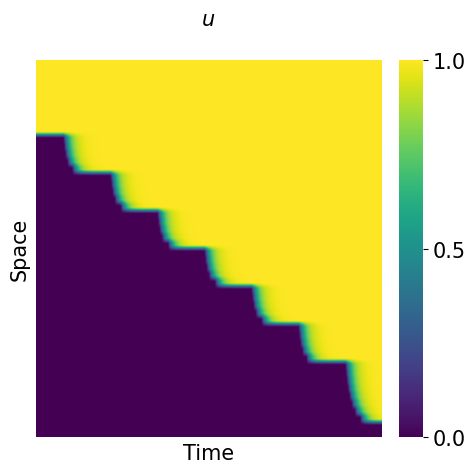

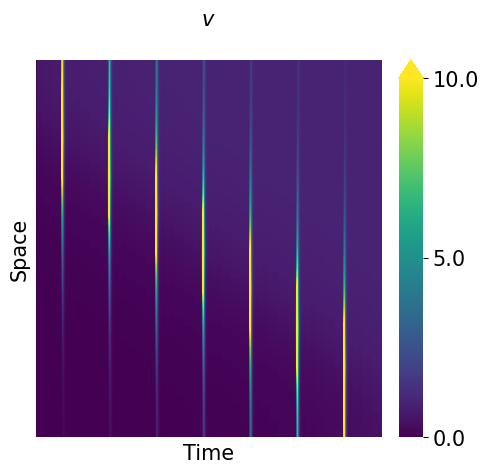

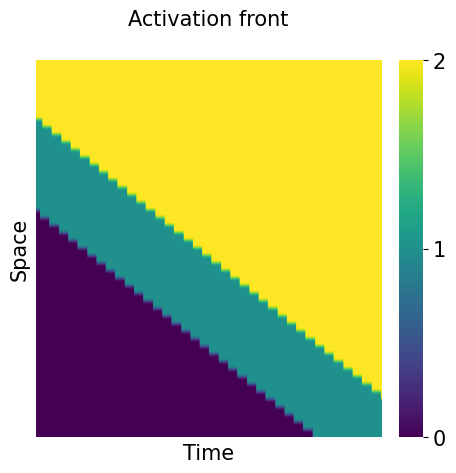

In [4]:
plot_kymo(results[0], r'$u$', colorbar=True, cb_ticks=[0, 0.5, 1.])
plot_kymo(results[1], r'$v$', vmin=0., vmax=10., colorbar=True, cb_ticks=[0., 5., 10., np.max(results[1])])

tt, xx = np.meshgrid(times, ap_positions)
g_u = heaviside(param['elongation_speed']*tt - xx + param['x1'])
g_v = heaviside(param['elongation_speed']*tt - xx + param['x2'])
plot_kymo(g_u+g_v, 'Activation front', colorbar=True, cb_ticks=[0, 1, 2])

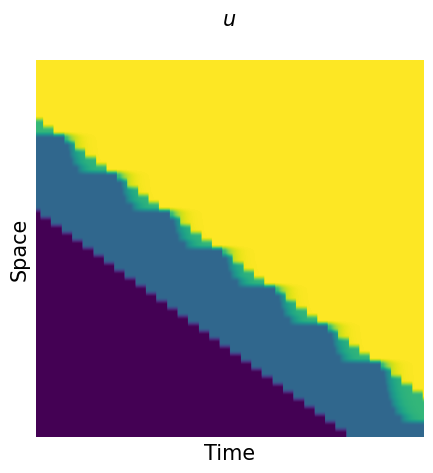

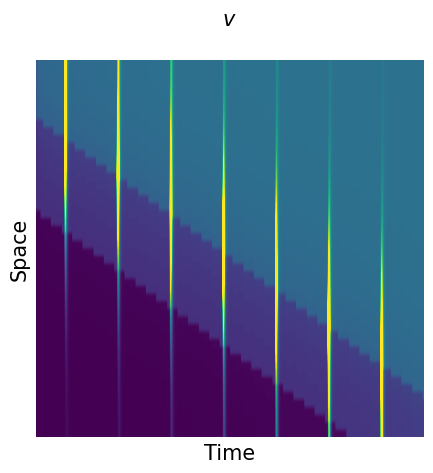

In [5]:
plot_kymo(results[0]+g_u+g_v, r'$u$')
plot_kymo(results[1]+g_u+g_v, r'$v$', vmin=0., vmax=8.)

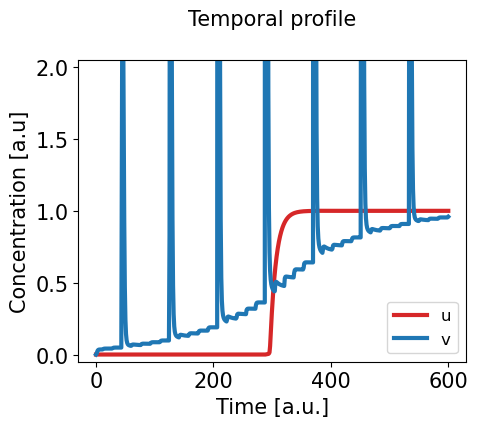

In [6]:
names_plot = ['u', 'v']
colors_plot = ['tab:red', 'tab:blue']

fig, ax = plt.subplots(1, 1, figsize = (5,4))
for i in range(2):
    # ax.plot(times, results[i, 29], c = colors_plot[i], label = names_plot[i])
    # ax.plot(times, results[i, 28], c = colors_plot[i], label = names_plot[i])
    # ax.plot(times, results[i, 26], c = colors_plot[i], label = names_plot[i])
    ax.plot(times, results[i, 22], c = colors_plot[i], label = names_plot[i])
ax.legend()
ax.set_ylim([-0.05, 2.05])
ax.set_xlabel('Time [a.u.]')
ax.set_ylabel('Concentration [a.u]')
ax.set_title('Temporal profile')
plt.show()

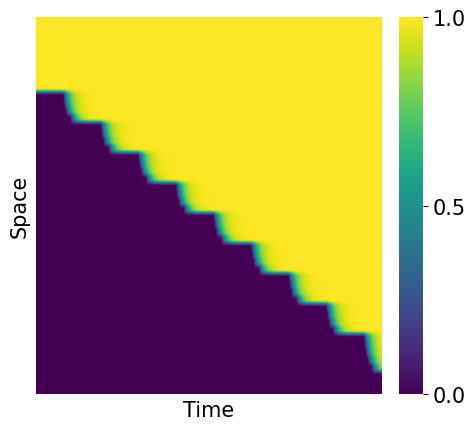

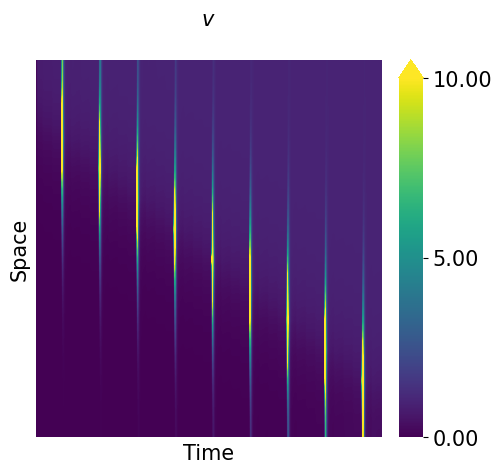

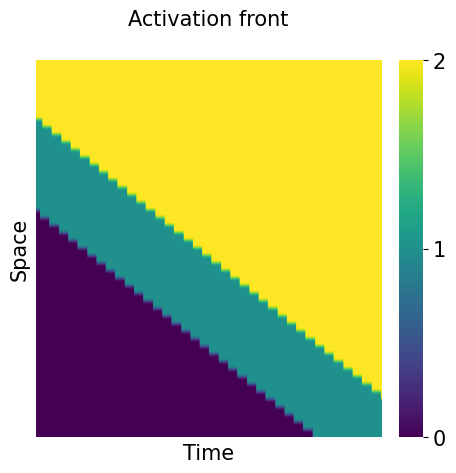

In [7]:
param = { 'mu': 0.0001,
         'gamma': 0.01,
         'kappa': 10.,
         'epsilon': 0.001,
         'D': 30., 
         'elongation_speed': 0.00125,
         'x1': 0.4,
         'x2': 0.15
        }

results = integrate(dconc_1d, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions, param)).y
results = np.reshape(results, (2, n_cells, -1))

plot_kymo(results[0], colorbar=True, cb_ticks=[0, 0.5, 1.])
plot_kymo(results[1], r'$v$', vmin=0., vmax=10., colorbar=True, cb_ticks=[0., 5., 10., np.max(results[1])])

tt, xx = np.meshgrid(times, ap_positions)
g_u = heaviside(param['elongation_speed']*tt - xx + param['x1'])
g_v = heaviside(param['elongation_speed']*tt - xx + param['x2'])
plot_kymo(g_u+g_v, 'Activation front', colorbar=True, cb_ticks=[0, 1, 2])

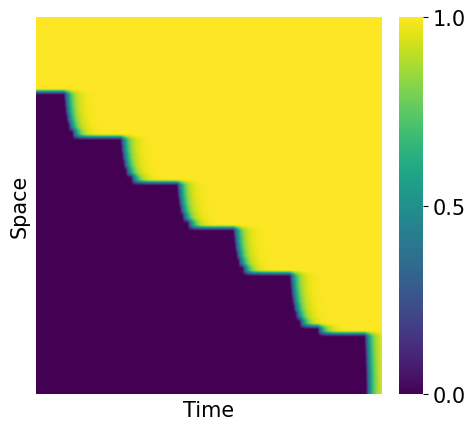

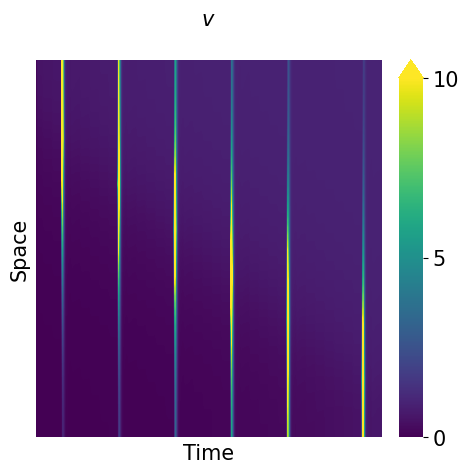

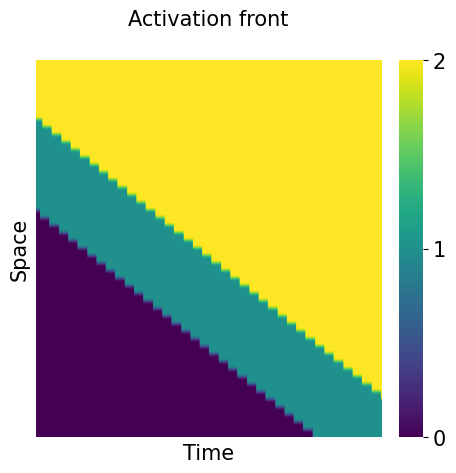

In [8]:
param = { 'mu': 0.0001,
         'gamma': 0.01,
         'kappa': 10.,
         'epsilon': 0.001,
         'D': 120., 
         'elongation_speed': 0.00125,
         'x1': 0.4,
         'x2': 0.15
        }

results = integrate(dconc_1d, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions, param)).y
results = np.reshape(results, (2, n_cells, -1))

plot_kymo(results[0], colorbar=True, cb_ticks=[0, 0.5, 1.])
plot_kymo(results[1], r'$v$', vmin=0., vmax=10., colorbar=True, cb_ticks=[0., 5., 10., np.max(results[1])])

tt, xx = np.meshgrid(times, ap_positions)
g_u = heaviside(param['elongation_speed']*tt - xx + param['x1'])
g_v = heaviside(param['elongation_speed']*tt - xx + param['x2'])
plot_kymo(g_u+g_v, 'Activation front', colorbar=True, cb_ticks=[0, 1, 2])

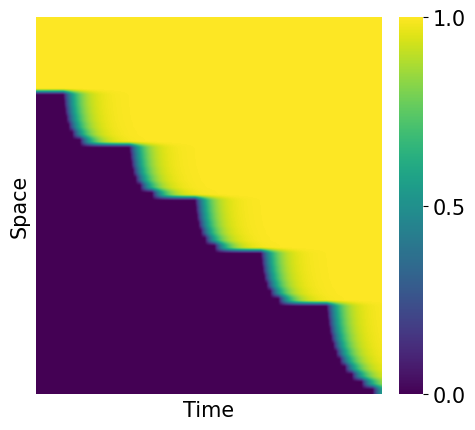

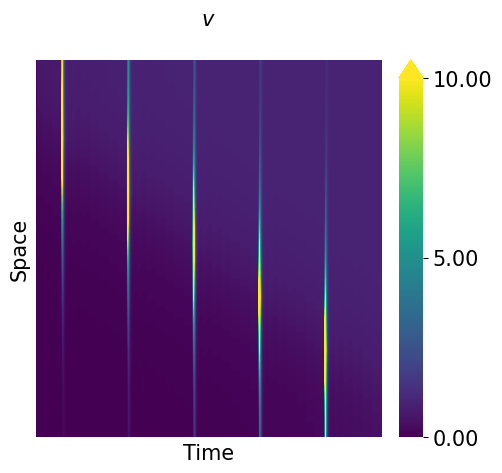

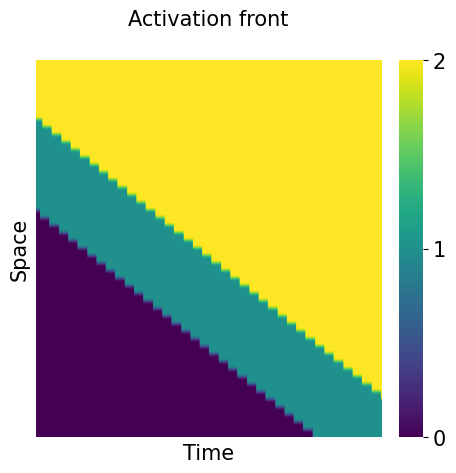

In [9]:
param = { 'mu': 0.0001,
         'gamma': 0.01,
         'kappa': 20.,
         'epsilon': 0.001,
         'D': 60., 
         'elongation_speed': 0.00125,
         'x1': 0.4,
         'x2': 0.15
        }

results = integrate(dconc_1d, (np.min(times), np.max(times)), init_conc.flatten(), method='LSODA', t_eval=times, args=(ap_positions, param)).y
results = np.reshape(results, (2, n_cells, -1))

plot_kymo(results[0], colorbar=True, cb_ticks=[0, 0.5, 1.])
plot_kymo(results[1], r'$v$', vmin=0., vmax=10., colorbar=True, cb_ticks=[0., 5., 10., np.max(results[1])])

tt, xx = np.meshgrid(times, ap_positions)
g_u = heaviside(param['elongation_speed']*tt - xx + param['x1'])
g_v = heaviside(param['elongation_speed']*tt - xx + param['x2'])
plot_kymo(g_u+g_v, 'Activation front', colorbar=True, cb_ticks=[0, 1, 2])

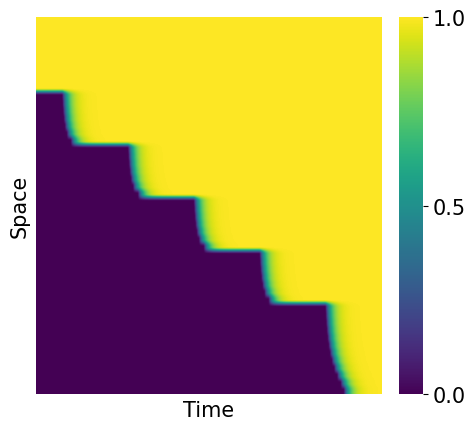

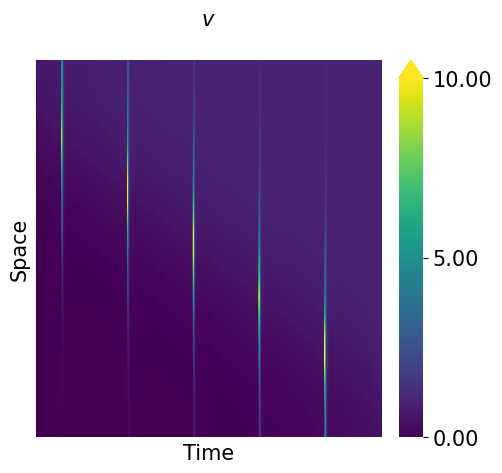

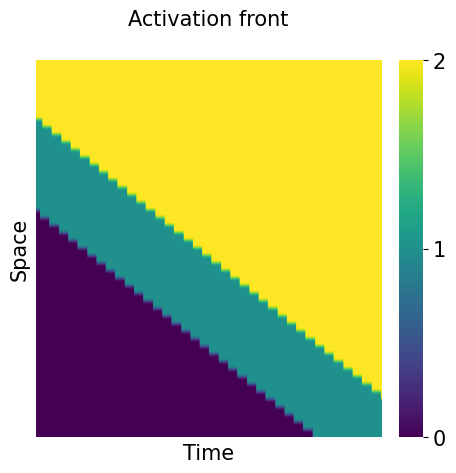

In [10]:
param = { 'mu': 0.0003,
         'gamma': 0.01,
         'kappa': 10.,
         'epsilon': 0.001,
         'D': 60., 
         'elongation_speed': 0.00125,
         'x1': 0.4,
         'x2': 0.15
        }

results = integrate(dconc_1d, (np.min(times), np.max(times)), init_conc.flatten(), method='RK45', t_eval=times, args=(ap_positions, param)).y
results = np.reshape(results, (2, n_cells, -1))

plot_kymo(results[0], colorbar=True, cb_ticks=[0, 0.5, 1.])
plot_kymo(results[1], r'$v$', vmin=0., vmax=10., colorbar=True, cb_ticks=[0., 5., 10., np.max(results[1])])

tt, xx = np.meshgrid(times, ap_positions)
g_u = heaviside(param['elongation_speed']*tt - xx + param['x1'])
g_v = heaviside(param['elongation_speed']*tt - xx + param['x2'])
plot_kymo(g_u+g_v, 'Activation front', colorbar=True, cb_ticks=[0, 1, 2])